<a href="https://colab.research.google.com/github/umrsid/exploring-cryptocurrency-market/blob/main/ETH_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("ETH-USD.csv")

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1593,2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098
1594,2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230
1595,2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658
1596,2022-03-24,3031.060791,3118.387695,3012.326660,3108.062012,3108.062012,18070503166
1597,2022-03-25,3109.523438,3182.826660,3097.624268,3122.535889,3122.535889,16882068480


In [ ]:
df["Date"].max()

'2022-03-25'

([<matplotlib.axis.XTick at 0x7fd0ec040fa0>], [Text(1598.0, 0, 'Date')])

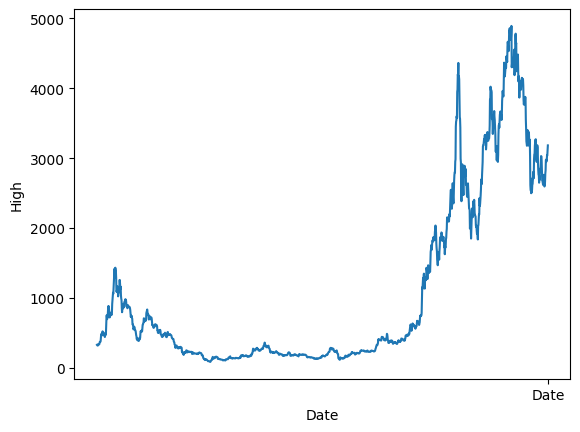

In [ ]:
sns.lineplot(x="Date",y="High",data=df)
plt.xticks("Date")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


<ipython-input-275-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


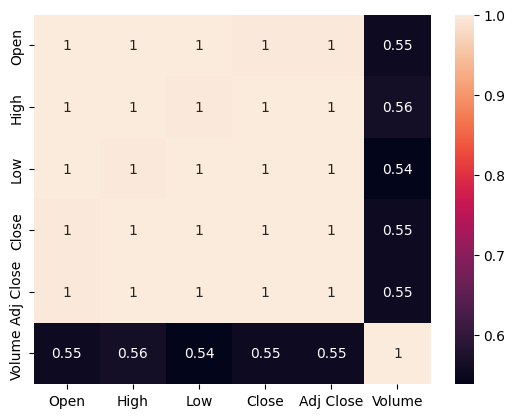

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
import pandas as pd

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, day, hour, and minute as new features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['minute'] = df['Date'].dt.minute

# Drop the original Date column
df = df.drop('Date', axis=1)


In [ ]:
X = df[["year"	,"month"	,"day",	"hour",	"minute"]]
y= df["Close"]
X_train, X_test,y_train , y_test = train_test_split(X,y,test_size=0.3)
# X_train.shape
# y_train.shape

In [ ]:
# firstly scale ur Data
from sklearn.decomposition import PCA

pca = PCA(0.95)  # we can also give number like 13 # fuctions keep kro only!
X_pca = pca.fit_transform(X)
X_pca.shape
print(X_pca)
# pca.explained_variance_ratio_ 
# pca.n_components_

[[-6.66184778  4.84474792]
 [-5.6619294   4.83229753]
 [-4.66201102  4.81984714]
 ...
 [ 7.21999508 -3.74591871]
 [ 8.21991346 -3.7583691 ]
 [ 9.21983184 -3.7708195 ]]


In [ ]:
X_train

,year,month,day,hour,minute
1457,2021,11,5,0,0
418,2019,1,1,0,0
728,2019,11,7,0,0
929,2020,5,26,0,0
1317,2021,6,18,0,0
...,...,...,...,...,...
1498,2021,12,16,0,0
1124,2020,12,7,0,0
295,2018,8,31,0,0
374,2018,11,18,0,0


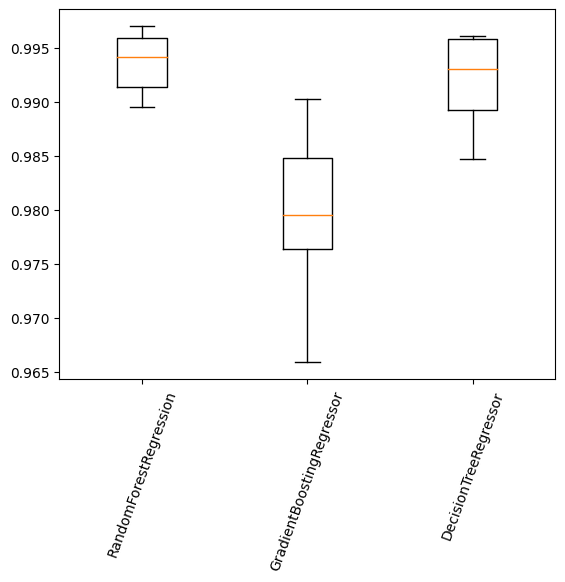

In [ ]:
# REGRESSION MODEL
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
models = {"RandomForestRegression":RandomForestRegressor(),
          "GradientBoostingRegressor":GradientBoostingRegressor(), "DecisionTreeRegressor":DecisionTreeRegressor()}
results = []
# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  # Append the results
  results.append(cv_scores)
# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.xticks(rotation=70)
plt.show()

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train,y_train)
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train,y_train)
# model = DecisionTreeRegressor()
# model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# print(predictions)

In [ ]:
kf = KFold(n_splits=6, random_state=42, shuffle=True)
cv_scores = cross_val_score(model, X_test, y_test, cv=kf)

In [ ]:
np.average(cv_scores)

0.9885443325415834

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)
"""

MAE: 16.720113602041515   # of by $16
RMSE: 40.93307707795973   # of by $40
R²: 0.9949686918273795    # The R² score of 0.995 indicates that the model explains 99.5% of the variance in the target variable, 
 ###    which is generally considered to be a very good performance.

"""

MAE: 47.08781605820943
RMSE: 101.56570711687782
R²: 0.9934737462032114


'\n\nMAE: 16.720113602041515   # of by $16\nRMSE: 40.93307707795973   # of by $40\nR²: 0.9949686918273795    # The R² score of 0.995 indicates that the model explains 99.5% of the variance in the target variable, \n ###    which is generally considered to be a very good performance.\n\n'

In [ ]:
dff = pd.DataFrame({"year": [2023 for i in range(30)],"month": [3 for i in range(30)],"day": [i for i in range(1,31)],"hour": [23 for i in range(30)],"minute": [59 for i in range(30)]})

In [ ]:
y_pred = model.predict(dff)

In [ ]:
print(y_pred)

[2915.54892577 2924.94929924 2914.88248527 2704.61681771 2644.07995134
 2574.04164975 2529.15134064 2598.43047132 2667.52748615 2631.39538081
 2602.44095648 2622.28195414 2620.25620953 2645.65653842 2648.42290669
 2735.79659938 2791.23027481 2838.98147892 2897.15276649 2915.9975217
 2927.32803777 2957.26880327 2999.04323287 3065.30040324 3081.51411165
 3034.41685528 3018.22295557 3018.22295557 3023.83087793 3023.83087793]
